In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/textdb3/fake_or_real_news.csv


# Reading and cleaning data

In [2]:
df = pd.read_csv('../input/textdb3/fake_or_real_news.csv')
df

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


**Cheking for missing data:**

In [3]:
df.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

**We should replace values of label column to int values;**

**FAKE news = 1**

**REAL news = 0**

In [4]:
df['label'] = df['label'].replace(['FAKE','REAL'] , [1,0])
df

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",1
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,1
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,0
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",1
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,0
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,0
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,1
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,1
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",0


In [5]:
X = df.drop(['Unnamed: 0','label'], axis=1)
X

,title,text
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello..."
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T..."
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...
...,...,...
6330,State Department says it can't find emails fro...,The State Department told the Republican Natio...
6331,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...
6332,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...
6333,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene..."


In [6]:
y = df['label']
y

0       1
1       1
2       0
3       1
4       0
       ..
6330    0
6331    1
6332    1
6333    0
6334    0
Name: label, Length: 6335, dtype: int64

**Cleaning the data (specifically "text" column) such as:**


* drop nona-alphabet characters
* convert to lower characters
* split words and stemming non-stopwords

In [7]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()
corpus = []
for i in range(0, len(df)):
    review = re.sub('[^a-zA-Z]', ' ', df['text'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

**For training purposes we need vocabulary size and len of biggest text**

In [8]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
vocab_size = len(list(set(tokenizer.word_index)))
max_doc_len = max(len(doc.split()) for doc in corpus)
print('vocab size = ', vocab_size, '\n')
print('max len of docs = ', max_doc_len)

vocab size =  43752 

max len of docs =  10286


**Convert words in the data to one-hot representation and padding all of docs in corpus**

In [9]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import one_hot

onehot_reprsnt = [one_hot(words,vocab_size)for words in corpus]
embedded_docs = pad_sequences(onehot_reprsnt, padding='pre', maxlen=max_doc_len)

**Split the data to train and test sets**

In [10]:
from sklearn.model_selection import train_test_split

X = np.array(embedded_docs)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Training and Tuning the model

**Here, we create some sequential models for tuning hyperparametes like learning rate, number of LSTM units and output_dim of Embedding layer using keras_tuner**

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow import keras
import keras_tuner as kt

def model_builder(hp):
    
    model=Sequential()
    hp1 = hp.Int('Embedding output_dim', min_value=50, max_value=100, step=25)
    model.add(Embedding(input_dim=vocab_size, output_dim=hp1, input_length=max_doc_len))
    hp2 = hp.Int('LSTM units', min_value=300, max_value=500, step=100)
    model.add(LSTM(hp2))
    model.add(Dense(1,activation='sigmoid'))

    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

**Here, I use Hyperband tuner; you can also use "RandomSearch", "BayesianOptimization" or "Sklearn" tuners**

In [12]:
tuner = kt.Hyperband(model_builder,
                     objective='val_accuracy',
                     max_epochs=9,
                     factor=3,
                     seed=42)

2022-08-05 18:34:28.374639: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-05 18:34:28.593524: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-05 18:34:28.598902: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-05 18:34:28.605393: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [13]:
tuner.search(x=X_train, 
             y=y_train, 
             validation_split=0.2, 
             callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)],
             epochs=30)

best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

Trial 23 Complete [00h 19m 00s]
val_accuracy: 0.8613303303718567

Best val_accuracy So Far: 0.8759864568710327
Total elapsed time: 02h 29m 03s


In [20]:
print("hp1: best num of Embedding output_dim = ", best_hps.get('Embedding output_dim'), '\n')
print("hp2: best num of LSTM units = ", best_hps.get('LSTM units'), '\n')
print("best learning rate = ", best_hps.get('learning_rate'))

hp1: best num of Embedding output_dim =  75 

hp2: best num of LSTM units =  300 

best learning rate =  0.0001


**We've found best hyperparametes values; So we can train the model**

In [14]:
model = tuner.hypermodel.build(best_hps)
model_hstry = model.fit(x=X_train,
                        y=y_train,
                        validation_split=0.2,
                        epochs=30)

Epoch 1/30
111/111 [==============================] - 100s 881ms/step - loss: 0.7046 - accuracy: 0.6380 - val_loss: 0.6748 - val_accuracy: 0.6471
Epoch 2/30
111/111 [==============================] - 97s 876ms/step - loss: 0.6260 - accuracy: 0.7829 - val_loss: 0.4464 - val_accuracy: 0.8038
Epoch 3/30
111/111 [==============================] - 97s 876ms/step - loss: 0.3748 - accuracy: 0.8545 - val_loss: 0.3997 - val_accuracy: 0.8749
Epoch 4/30
111/111 [==============================] - 97s 877ms/step - loss: 0.2577 - accuracy: 0.9143 - val_loss: 0.2977 - val_accuracy: 0.8861
Epoch 5/30
111/111 [==============================] - 97s 876ms/step - loss: 0.1928 - accuracy: 0.9383 - val_loss: 0.3756 - val_accuracy: 0.8625
Epoch 6/30
111/111 [==============================] - 97s 876ms/step - loss: 0.1839 - accuracy: 0.9476 - val_loss: 0.3106 - val_accuracy: 0.8782
Epoch 7/30
111/111 [==============================] - 97s 878ms/step - loss: 0.1325 - accuracy: 0.9622 - val_loss: 0.3100 - val_a

**Although we've got hyperparameters but we dont know best number of ephoc; So we should get it and train the final model**

In [15]:
val_acc_per_epoch = model_hstry.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch = ', best_epoch)

Best epoch =  11


In [23]:
final_model = tuner.hypermodel.build(best_hps)
final_model_hstry = final_model.fit(x=X_train,
                                    y=y_train,
                                    validation_split=0.2, 
                                    epochs=best_epoch)

Epoch 1/11
111/111 [==============================] - 100s 885ms/step - loss: 0.6857 - accuracy: 0.5920 - val_loss: 0.5869 - val_accuracy: 0.7756
Epoch 2/11
111/111 [==============================] - 98s 881ms/step - loss: 0.5148 - accuracy: 0.7824 - val_loss: 0.5122 - val_accuracy: 0.8444
Epoch 3/11
111/111 [==============================] - 97s 878ms/step - loss: 0.3758 - accuracy: 0.8822 - val_loss: 0.2947 - val_accuracy: 0.8737
Epoch 4/11
111/111 [==============================] - 97s 878ms/step - loss: 0.2199 - accuracy: 0.9256 - val_loss: 0.2757 - val_accuracy: 0.8828
Epoch 5/11
111/111 [==============================] - 97s 878ms/step - loss: 0.1611 - accuracy: 0.9518 - val_loss: 0.3807 - val_accuracy: 0.8433
Epoch 6/11
111/111 [==============================] - 97s 878ms/step - loss: 0.2492 - accuracy: 0.9374 - val_loss: 0.2662 - val_accuracy: 0.8963
Epoch 7/11
111/111 [==============================] - 98s 880ms/step - loss: 0.0909 - accuracy: 0.9732 - val_loss: 0.2533 - val_a

**Plotting validation accuracy and validation loss**

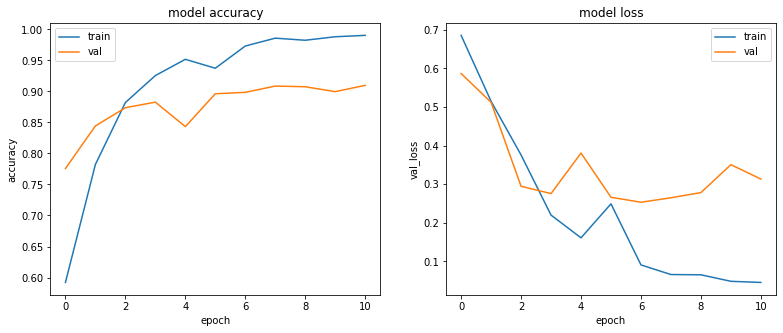

In [24]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(13,5))

ax[0].plot(final_model_hstry.history['accuracy'])
ax[0].plot(final_model_hstry.history['val_accuracy'])
ax[0].set_title('model accuracy')
ax[0].set_ylabel('accuracy')
ax[0].set_xlabel('epoch')
ax[0].legend(['train', 'val'], loc='upper left')

ax[1].plot(final_model_hstry.history['loss'])
ax[1].plot(final_model_hstry.history['val_loss'])
ax[1].set_title('model loss')
ax[1].set_ylabel('val_loss')
ax[1].set_xlabel('epoch')
ax[1].legend(['train', 'val'], loc='upper right')

fig.show()

# Testing the model

In [25]:
final_model.evaluate(x = X_test,
                     y = y_test,
                     verbose=1)

60/60 [==============================] - 17s 277ms/step - loss: 0.3331 - accuracy: 0.9074


[0.33313336968421936, 0.9074171781539917]

In [26]:
from sklearn.metrics import classification_report

model_prds = final_model.predict(x = X_test)
for i in range(len(model_prds)):
    if model_prds[i] >= 0.5:
        model_prds[i] = 1
    elif model_prds[i] < 0.5:
        model_prds[i] = 0

classes = ['Class REAL', 'Class FAKE']
print(classification_report(y_true = y_test,
                            y_pred = model_prds,
                            target_names = classes))

              precision    recall  f1-score   support

  Class REAL       0.92      0.89      0.90       933
  Class FAKE       0.90      0.92      0.91       968

    accuracy                           0.91      1901
   macro avg       0.91      0.91      0.91      1901
weighted avg       0.91      0.91      0.91      1901

